In [1]:
# Load libraries
import pandas
import numpy
from sklearn import metrics
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
# Load dataset
url = "adult.csv"
#url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pandas.read_csv(url)

In [3]:
#Dataset Description
print(df.head(20))
print(df.describe())

    age         workclass  fnlwgt     education  educational-num  \
0    25           Private  226802          11th                7   
1    38           Private   89814       HS-grad                9   
2    28         Local-gov  336951    Assoc-acdm               12   
3    44           Private  160323  Some-college               10   
4    18                 ?  103497  Some-college               10   
5    34           Private  198693          10th                6   
6    29                 ?  227026       HS-grad                9   
7    63  Self-emp-not-inc  104626   Prof-school               15   
8    24           Private  369667  Some-college               10   
9    55           Private  104996       7th-8th                4   
10   65           Private  184454       HS-grad                9   
11   36       Federal-gov  212465     Bachelors               13   
12   26           Private   82091       HS-grad                9   
13   58                 ?  299831       HS-grad 

In [4]:
#Preprocessing Data
#1)Finding the number of missing values

In [5]:
col_names = df.columns
num_data = df.shape[0]
print("Description of missing values\n")
for c in col_names:
    # print(df[c])
    num_non = df[c].isin(["?"]).sum()
    # print(num_non)
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

Description about the attributes containing number of missing values

workclass
2799
5.73%


occupation
2809
5.75%


native-country
857
1.75%




In [6]:
#2)Impuding the missing values
#replacing the missing with NaN then with the top occurring value in the column

In [7]:
col_names = df.columns
for c in col_names:
	df[c] = df[c].replace("?", numpy.NaN)

df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [8]:
print(df.isnull().sum())
print(df.describe())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000  

In [9]:
#3)Converting Categorical data to Numeric data

In [10]:
category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'gender', 'native-country', 'income'] 
labelEncoder = preprocessing.LabelEncoder()
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])

# making a copy of the data frame
df.to_csv('adult_edited.csv',index=False)

In [11]:
#Prediction without any feature selection
#Desicion Tree

In [12]:
### Slicing data ###
X = df.values[:, 0:14]
Y = df.values[:,14]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [13]:
### Desicion Tree with Gini Index ###

dt_clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5)
dt_clf_gini.fit(X_train, y_train)
### Desicion Tree with Information Gain ###

dt_clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=5, min_samples_leaf=5)

dt_clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [14]:
y_pred_gini = dt_clf_gini.predict(X_test)
y_pred_en = dt_clf_entropy.predict(X_test)

In [15]:
#Accuracy Scores And Precision value
print "Desicion Tree using Gini Index\nAccuracy is ", accuracy_score(y_test,y_pred_gini)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred_gini)
print "Desicion Tree using Information Gain\nAccuracy is ", accuracy_score(y_test,y_pred_en)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred_en)

Desicion Tree using Gini Index
Accuracy is  85.0406060192452 

Precision Value is
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     11121
           1       0.77      0.54      0.63      3532

   micro avg       0.85      0.85      0.85     14653
   macro avg       0.82      0.74      0.77     14653
weighted avg       0.84      0.85      0.84     14653

Desicion Tree using Information Gain
Accuracy is  85.03378147819559 

Precision Value is
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     11121
           1       0.77      0.53      0.63      3532

   micro avg       0.85      0.85      0.85     14653
   macro avg       0.82      0.74      0.77     14653
weighted avg       0.84      0.85      0.84     14653



[[10567   554]
 [ 1638  1894]]
[[10572   549]
 [ 1644  1888]]


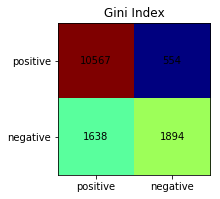

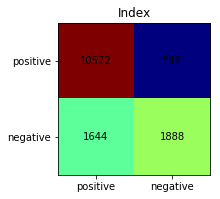

In [16]:
#Confusion Matrix
conf_arr_gini =confusion_matrix(y_test,y_pred_gini)
conf_arr_en =confusion_matrix(y_test,y_pred_en)

print(conf_arr_gini)
print(conf_arr_en)

norm_conf = []
for i in conf_arr_gini:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(numpy.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr_gini.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr_gini[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Gini Index")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

norm_conf_1 = []
for i in conf_arr_en:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf_1.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax1 = fig.add_subplot(1,2,2)
ax1.set_aspect(1)
res = ax1.imshow(numpy.array(norm_conf_1), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr_en.shape

for x in xrange(width):
    for y in xrange(height):
        ax1.annotate(str(conf_arr_en[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Index")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

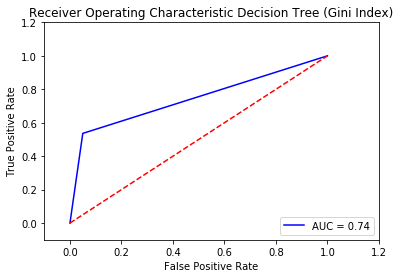

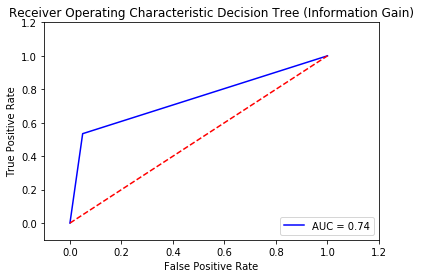

In [17]:
#Roc/AOC
from sklearn.metrics import roc_curve, auc

## Gini Index

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_gini)
roc_auc_gini = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic Decision Tree (Gini Index)')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc_gini)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Information Gain         
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_en)
roc_auc_en = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic Decision Tree (Information Gain)')
plt.plot(false_positive_rate, true_positive_rate, 'b',label= "AUC = %0.2f"% roc_auc_en)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
# Naive Bayes

In [19]:
# Load dataset
url = "adult_edited.csv"
# names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pandas.read_csv(url)

In [20]:
### Slicing data ###
X = df.values[:, 0:14]
Y = df.values[:,14]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print "\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred)


Accuracy is  79.60827134375214 

Precision Value is
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     11121
           1       0.67      0.31      0.42      3532

   micro avg       0.80      0.80      0.80     14653
   macro avg       0.74      0.63      0.65     14653
weighted avg       0.78      0.80      0.77     14653



[[10584   537]
 [ 2451  1081]]


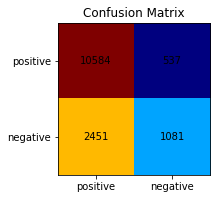

In [21]:
# Confusion Matrix
conf_arr =confusion_matrix(y_test,y_pred)
print(conf_arr)

norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(numpy.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

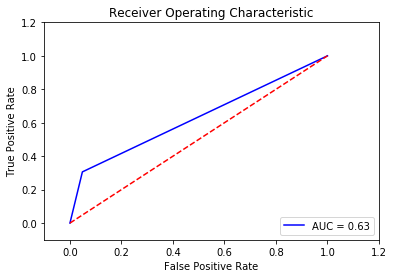

In [22]:
#Roc/AOC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
#Random Forest

In [24]:
# Load dataset
url = "adult_edited.csv"
# names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pandas.read_csv(url)
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,9,3,4,0,0,0,30,38,0
5,34,3,198693,0,6,4,7,1,4,1,0,0,30,38,0
6,29,3,227026,11,9,4,9,4,2,1,0,0,40,38,0
7,63,5,104626,14,15,2,9,0,4,1,3103,0,32,38,1
8,24,3,369667,15,10,4,7,4,4,0,0,0,40,38,0
9,55,3,104996,5,4,2,2,0,4,1,0,0,10,38,0


In [25]:
X = df.values[:, 0:14]
y = df.values[:,14]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
print "\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",classification_report(y_test,y_pred)

/Users/shan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/shan/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Accuracy is  84.6584317204668 

Precision Value is
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11121
           1       0.73      0.57      0.64      3532

   micro avg       0.85      0.85      0.85     14653
   macro avg       0.80      0.75      0.77     14653
weighted avg       0.84      0.85      0.84     14653



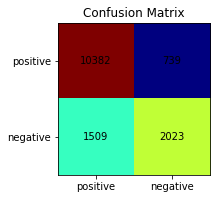

In [26]:
conf_arr =confusion_matrix(y_test,y_pred)


norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(numpy.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

[0.         0.06645086 1.        ]
[0.         0.57276331 1.        ]
[2 1 0]
0.7531562240862711


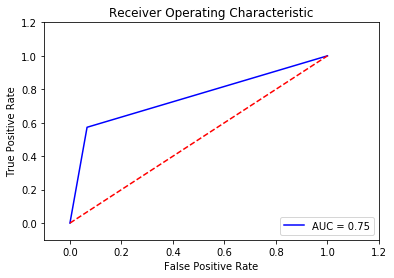

In [27]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(false_positive_rate)
print(true_positive_rate)
print(thresholds)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
# SVM

In [29]:
# Load dataset
url = "adult_edited.csv"
df = pandas.read_csv(url)
print(df.shape)
print(df.head(20))

(48842, 15)
    age  workclass  fnlwgt  education  educational-num  marital-status  \
0    25          3  226802          1                7               4   
1    38          3   89814         11                9               2   
2    28          1  336951          7               12               2   
3    44          3  160323         15               10               2   
4    18          3  103497         15               10               4   
5    34          3  198693          0                6               4   
6    29          3  227026         11                9               4   
7    63          5  104626         14               15               2   
8    24          3  369667         15               10               4   
9    55          3  104996          5                4               2   
10   65          3  184454         11                9               2   
11   36          0  212465          9               13               2   
12   26          3   82091

In [30]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

X = df.values[:, :14]
y = df.values[:,14]


X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = svm.SVC(kernel='rbf',decision_function_shape='ovr',max_iter=9000)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

/Users/shan/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=9000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)



Accuracy is  84.87429366964213 

Precision Value is
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9287
           1       0.75      0.55      0.64      2924

   micro avg       0.85      0.85      0.85     12211
   macro avg       0.81      0.75      0.77     12211
weighted avg       0.84      0.85      0.84     12211



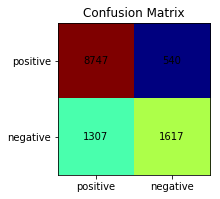

In [31]:
print "\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred)
conf_arr =confusion_matrix(y_test,y_pred)


norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

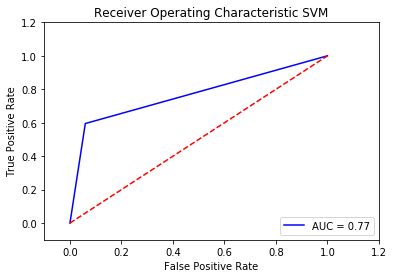

In [55]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic SVM')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
# K N N   (n = 3 )
from sklearn.neighbors import KNeighborsClassifier

X = df.values[:, :14]
y = df.values[:,14]


X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print "\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred)


Accuracy is  76.38195070018836 

Precision Value is
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      9261
           1       0.51      0.40      0.45      2950

   micro avg       0.76      0.76      0.76     12211
   macro avg       0.67      0.64      0.65     12211
weighted avg       0.75      0.76      0.75     12211



[[8159 1102]
 [1782 1168]]


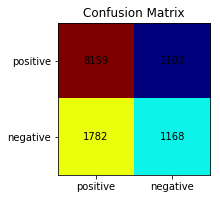

In [34]:
# Confusion Matrix
conf_arr =confusion_matrix(y_test,y_pred)
print(conf_arr)

norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(numpy.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

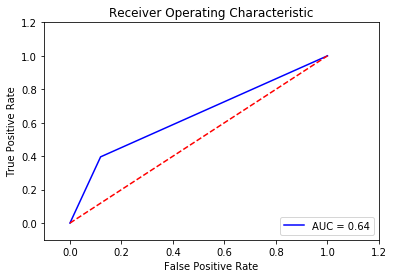

In [35]:
# ROC / AUC 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)



plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
# K N N   (n = 5 )
from sklearn.neighbors import KNeighborsClassifier

X = df.values[:, :14]
y = df.values[:,14]


X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print "\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred)


Accuracy is  77.58578331013021 

Precision Value is
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      9252
           1       0.56      0.35      0.43      2959

   micro avg       0.78      0.78      0.78     12211
   macro avg       0.69      0.63      0.65     12211
weighted avg       0.75      0.78      0.76     12211



[[8430  822]
 [1915 1044]]


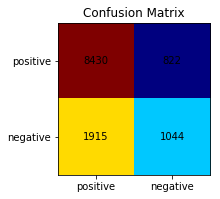

In [37]:
# Confusion Matrix
conf_arr =confusion_matrix(y_test,y_pred)
print(conf_arr)

norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(numpy.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

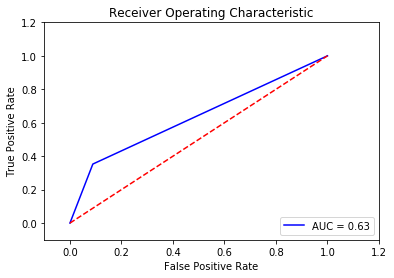

In [38]:
# ROC / AUC 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)



plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
# K N N can be tested 3 5 7 9 .. 

In [40]:
# Logistic Regression 

In [41]:
### Slicing data ###
X = df.values[:, 0:14]
Y = df.values[:,14]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

Log_Reg = LogisticRegression()
Log_Reg.fit(X_train,y_train)
y_pred=Log_Reg.predict(X_test)
print "\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred)

/Users/shan/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Accuracy is  79.34893878386679 

Precision Value is
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     11121
           1       0.67      0.28      0.40      3532

   micro avg       0.79      0.79      0.79     14653
   macro avg       0.74      0.62      0.64     14653
weighted avg       0.77      0.79      0.76     14653



[[10629   492]
 [ 2534   998]]


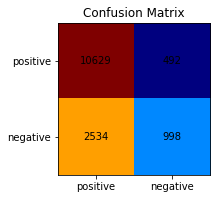

In [42]:
#Confusion Matrix
conf_arr =confusion_matrix(y_test,y_pred)
print(conf_arr)

norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(numpy.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()

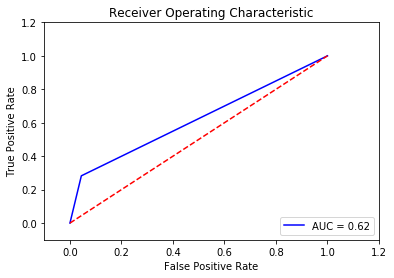

In [43]:
# ROC/AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)



plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
# adaBoost

In [45]:
# Load dataset
url = "adult_edited.csv"
# names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pandas.read_csv(url)

In [46]:
from sklearn.ensemble import AdaBoostClassifier
### Slicing data ###
X = df.values[:, 0:14]
Y = df.values[:,14]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

ada=AdaBoostClassifier(n_estimators=50,learning_rate=1)
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
print "\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",metrics.classification_report(y_test,y_pred)


Accuracy is  85.71623558315703 

Precision Value is
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11121
           1       0.76      0.60      0.67      3532

   micro avg       0.86      0.86      0.86     14653
   macro avg       0.82      0.77      0.79     14653
weighted avg       0.85      0.86      0.85     14653



[[10458   663]
 [ 1430  2102]]


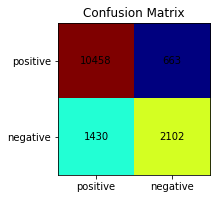

In [47]:
#Confusion Matrix
conf_arr =confusion_matrix(y_test,y_pred)
print(conf_arr)

norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(1,2,1)
ax.set_aspect(1)
res = ax.imshow(numpy.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in xrange(width):
    for y in xrange(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

plt.title("Confusion Matrix")
plt.xticks(range(width), ['positive','negative'])
plt.yticks(range(height), ['positive','negative'])
plt.show()


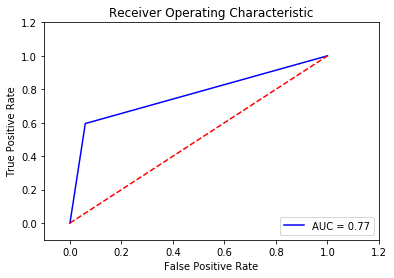

In [48]:
# Roc/AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)



plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
# Total Comparison

In [50]:
# Load libraries
import pandas
import numpy
from sklearn import metrics
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [51]:
###Decision Tree
false_positive_rate_dt=[0,0.04981566,1]
true_positive_rate_dt=[0,0.53624009,1]
thresholds_dt=[2,1,0]
roc_auc_DT=0.743212213271
cm_dt= numpy.array([[10567,554],[1638,1894]])


###Random Forest
false_positive_rate_rf=[0,0.06654078,1]
true_positive_rate_rf=[0,0.57502831,1]
thresholds_rf=[2,1,0]
roc_auc_rf=0.754243766932
cm_rf=numpy.array([[10367,754],[ 1470,  2062]])


###Naive Bayes
false_positive_rate_nb=[0,0.04828702, 1]
true_positive_rate_nb=[0,0.30605889,1 ]
thresholds_nb=[2,1,0]
roc_auc_nb=0.6288859328
cm_nb=numpy.array([[10584,537],[ 2451,1081]])



###SVM
false_positive_rate_svm=[ 0.        ,  0.05936999,  1.        ]
true_positive_rate_svm=[ 0.        ,  0.56148981,  1.        ]
thresholds_svm=[2,1,0]
roc_auc_svm=0.7510599078
cm_svm=numpy.array([[8809,556],[1248,1598]])

###K-N-N
false_positive_rate_knn=[0,0.063,1]
true_positive_rate_knn=[0,0.39,1]
thresholds_knn=[2,1,0]
roc_auc_knn=0.63
cm_knn=numpy.array([[8478,778],[1944,1011]]) 

### AdaBoost
false_positive_rate_adaBoost=[0,0.40,1]
true_positive_rate_adaBoost=[0,0.60,1]
thresholds_adaBoost=[2,1,0]
roc_auc_adaBoost=0.77
cm_adaBoost = numpy.array([[10458,663],[1430,2102]])


### Logistic Regression
false_positive_rate_lr=[0,0.04981566,1]
true_positive_rate_lr=[0,0.53624009,1]
thresholds_lr=[2,1,0]
roc_auc_lr=0.62
cm_lr = numpy.array([[10629,492],[2534,998]])

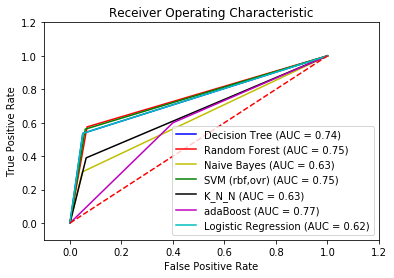

In [52]:
#ROC curve
plt.title('Receiver Operating Characteristic')

plt.plot(false_positive_rate_dt, true_positive_rate_dt, 'b',label='Decision Tree (AUC = %0.2f)'% roc_auc_DT)
plt.plot(false_positive_rate_rf, true_positive_rate_rf, 'r',label='Random Forest (AUC = %0.2f)'% roc_auc_rf)
plt.plot(false_positive_rate_nb, true_positive_rate_nb, 'y',label='Naive Bayes (AUC = %0.2f)'% roc_auc_nb)
plt.plot(false_positive_rate_svm, true_positive_rate_svm, 'g',label='SVM (rbf,ovr) (AUC = %0.2f)'% roc_auc_svm)
plt.plot(false_positive_rate_knn, true_positive_rate_knn, 'k',label='K_N_N (AUC = %0.2f)'% roc_auc_knn)
plt.plot(false_positive_rate_adaBoost, true_positive_rate_adaBoost, 'm',label='adaBoost (AUC = %0.2f)'% roc_auc_adaBoost)
plt.plot(false_positive_rate_lr, true_positive_rate_lr, 'c',label='Logistic Regression (AUC = %0.2f)'% roc_auc_lr)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROCplot.png',dpi= 300)
plt.show()

In [53]:
#Confusion Matrix

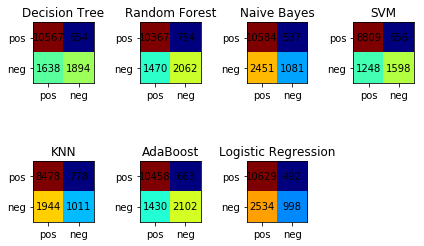

In [54]:
import numpy as np

fig = plt.figure()
plt.clf()
plt.tight_layout()

pos=1
cm_list=[]
cm_list.append(cm_dt)
cm_list.append(cm_rf)
cm_list.append(cm_nb)
cm_list.append(cm_svm)
cm_list.append(cm_knn)
cm_list.append(cm_adaBoost)
cm_list.append(cm_lr)


# print(cm_list)
for conf_arr in cm_list:
    norm_conf = []
    for i in conf_arr:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    
    ax = fig.add_subplot(2,4,pos)
    pos=pos+1
    ax.set_aspect(1)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                    interpolation='nearest')

    width, height = conf_arr.shape

    for x in xrange(width):
        for y in xrange(height):
            ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    
    tle=["Decision Tree","Random Forest","Naive Bayes", "SVM","KNN", "AdaBoost", "Logistic Regression"]
    plt.title(tle[pos-2])
    plt.xticks(range(width), ['pos','neg'])
    plt.yticks(range(height), ['pos','neg'])
plt.tight_layout()
plt.savefig('ConfusionMatrix.png',dpi=600)
plt.show()

In [ ]:
"""
This is the comparison of the all the algorithm on adult dataset 
First of all, spending time with featuring engineering such impuding the missing values
replacing the missing with NaN then with the top occurring value in the columnas one hot encoding,
change categorical data to numerical data. 
Secondly, get the edited csv and build the model, split the data, fit into and train the model.
And get the accuracy, include ROC,AUC, precision, recall, f1-score and confusion matrix of each 
algorithms. 

Top 2 performers

Decision Tree 
SVM 

Why top performers 



Learned stuffs
important of feature engineering 
can able to apply a lot of algorithms(model)


"""